<a href="https://colab.research.google.com/github/vieira-roberto/dev/blob/main/Aula3_RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Black'> **Aula 3 - Algoritmo Regressão Logística** </font>


Vamos criar um modelo preditivo que seja capaz de **prever se uma pessoa pode ou não desenvolver doenças do coração**. Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo. Este dataset descreve os registros médicos entre pacientes e cada registro está marcado se o paciente desenvolveu ou não doenças do coração.

Dataset disponível em: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Obs: dataset alterado nome dos atributos

###Dataset de entrada

In [ ]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Informações sobre os atributos:

1. dores_peito
2. pressao_arterial
3. colesterol
4. acucar_sangue
5. med_eletrocardio
6. freq_cadiaca_max
7. angina_induzida
8. talassemia_sangue
9. resultado **(1=DESENVOLVEU A DOENÇA 0=NÃO DESENVOLVEU A DOENÇA)**

In [ ]:
#Importação dos Dados - arquivo com dados dos pacientes
df = pd.read_csv('/content/drive/MyDrive/Pós Graduação/Data Science & Statistics/Aula 3/heart.csv')

In [ ]:
#linhas e colunas do dataset
df.shape

(768, 9)

In [ ]:
#5 primeiras linhas do dataset
df.head()

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cardiaca_max,angina_induzida,talassemia_sangue,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cardiaca_max,angina_induzida,talassemia_sangue,resultado
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Em problemas de classificação pode ser necessário balancear as classes.

Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento.

Podemos ver abaixo que existe uma clara desproporção entre as **classes 0 (não ocorrência de doenças cardíacas)** e **1 (ocorrência de doenças cardíacas).**

In [ ]:
# Distribuição das classes - atributo resultado
df.groupby('resultado').size()

,0
resultado,
0,500
1,268


Aqui, não vamos balancear. Existem bibliotecas que nos auxiliam a melhor forma de balancear. Um modo simples, sem biblioteca é buscar aleatoriamente no dataframe a mesma quantidade para ambas as classes.

<Axes: xlabel='colesterol', ylabel='count'>

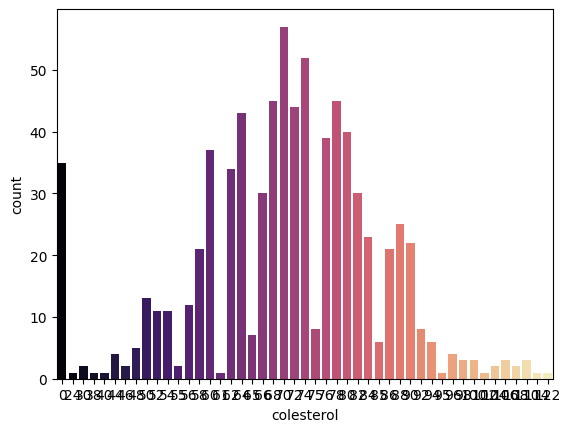

In [ ]:
#Representação gráfica do total de registros para cada classe resultado)
sns.countplot(x='colesterol', data=df, palette='magma')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dor_peito,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
pressao_arterial,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
colesterol,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
acucar_sangue,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
med_eletrocardio,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
freq_cardiaca_max,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
angina_induzida,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
talassemia_sangue,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
resultado,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Para balancear dados, segue alguns links com códigos:**

https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/

https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/

A correlação é o relacionamento entre 2 variáveis.

Correlação de **-1 mostra uma correlação negativa**, enquanto uma correlação de **+1 mostra uma correlação positiva**. Uma correlação igual a **0 mostra que não há relacionamento entre as variáveis**.

A regressão logística *pode apresentar problemas* de performance **se houver atributos altamente correlacionados**.

In [ ]:
#correlação
df.corr()

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cardiaca_max,angina_induzida,talassemia_sangue,resultado
dor_peito,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
pressao_arterial,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
colesterol,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
acucar_sangue,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
med_eletrocardio,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
freq_cardiaca_max,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
angina_induzida,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
talassemia_sangue,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

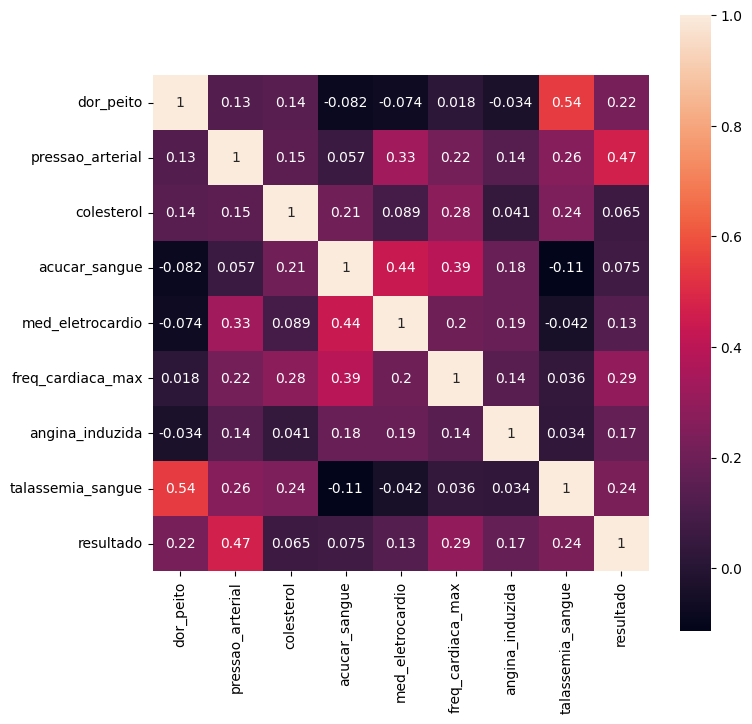

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(df.corr(), square=True, annot=True)

###Pré-Processamento dos Dados


Importante, verificar se existe dados faltantes, nulos, registros duplicados, etc.

As variáveis devem ser contínuas (numéricas)

Normalização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala.

Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1.

O scikit-learn possui uma função para esta etapa, chamada **MinMaxScaler()**.

In [ ]:
df.head()

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cardiaca_max,angina_induzida,talassemia_sangue,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Como é feita a normalização?

r = (valor - min) / (max - min)


In [ ]:
max = df['dor_peito'].max()
max

17

In [ ]:
min = df['dor_peito'].min()
min

0

In [ ]:
r = (14 - min) / (max - min)
r

0.8235294117647058

In [ ]:
colunas = ['dor_peito',	'pressao_arterial', 'colesterol']
df[colunas]

,dor_peito,pressao_arterial,colesterol
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
...,...,...,...
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60


In [ ]:
# Transformando os dados para a mesma escala (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

# Gerando a nova escala (normalizando os dados)
normalizador = MinMaxScaler(feature_range=(0, 1))

colunas = ['dor_peito',	'pressao_arterial', 'colesterol', 'acucar_sangue',
           'med_eletrocardio', 'freq_cardiaca_max', 'angina_induzida',
           'talassemia_sangue']
df[colunas] = normalizador.fit_transform(df[colunas])


In [ ]:
# Dados tranformados
df.head()

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cardiaca_max,angina_induzida,talassemia_sangue,resultado
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dor_peito,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
pressao_arterial,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
colesterol,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
acucar_sangue,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
med_eletrocardio,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
freq_cardiaca_max,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
angina_induzida,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
talassemia_sangue,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0
resultado,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Separando variáveis Independente X (previsoras) e Variável Dependente Y (resultado)

X = df[['dor_peito', 'pressao_arterial', 'colesterol','acucar_sangue',
        'med_eletrocardio', 'freq_cardiaca_max', 'angina_induzida',
        'talassemia_sangue']]

y = df['resultado']

In [ ]:
# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

In [ ]:
# Realizando Amostragem dos Dados
#base de teste = 20 a 30%  / base de treino = 70 a 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
#quantidade de registros para treino
X_train.shape

(537, 8)

In [ ]:
#quantidade de registros para teste
X_test.shape

(231, 8)

###Construindo a Máquina Preditiva

In [ ]:
#Importando Pacotes para Construção das Máquinas Preditivas com Machine Learning
from sklearn.linear_model import LogisticRegression

In [ ]:
maquina_preditiva = LogisticRegression()

In [ ]:
#treinando a máquina preditiva
maquina_preditiva.fit(X_train, y_train)

LogisticRegression()

###Após o Treinamento a gente faz as Previsões com a função "Predict"

O método .predict () é usado para obter a resposta prevista usando o modelo e leva o preditor X_test como argumento.

In [ ]:
y_pred = maquina_preditiva.predict(X_test)

In [ ]:
X_test

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cardiaca_max,angina_induzida,talassemia_sangue
353,0.058824,0.452261,0.508197,0.121212,0.050827,0.405365,0.214347,0.050000
236,0.411765,0.909548,0.688525,0.212121,0.226950,0.535022,0.216909,0.500000
323,0.764706,0.763819,0.737705,0.333333,0.034279,0.399404,0.278822,0.366667
98,0.352941,0.467337,0.409836,0.303030,0.075650,0.427720,0.118702,0.033333
701,0.352941,0.628141,0.639344,0.313131,0.000000,0.411326,0.207942,0.466667
...,...,...,...,...,...,...,...,...
188,0.470588,0.547739,0.622951,0.393939,0.134752,0.415797,0.239966,0.166667
351,0.235294,0.688442,0.688525,0.000000,0.000000,0.464978,0.074295,0.150000
120,0.000000,0.814070,0.622951,0.565657,0.118203,0.792846,0.290777,0.066667
108,0.176471,0.417085,0.475410,0.313131,0.021277,0.511177,0.110162,0.066667


In [ ]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_test.head()

,Actual,Predicted
353,0,0
236,1,1
323,1,1
98,0,0
701,1,0


In [ ]:
#probabilidade: computa probabilidades
maquina_preditiva.predict_proba(X_test)[0:5,:]

array([[0.87314259, 0.12685741],
       [0.21756687, 0.78243313],
       [0.31502782, 0.68497218],
       [0.80250189, 0.19749811],
       [0.58082878, 0.41917122]])

###Novas previsões

In [ ]:
# Prevendo novos dados com sua Máquina
dado1 = [0.352941, 0.743719, 0.590164, 0.353535, 0.000000, 0.500745, 0.234415, 0.483333] #1
dado2 = [0.058824, 0.427136, 0.540984, 0.292929, 0.000000, 0.396423, 0.116567, 0.166667] #0

x_new = [dado2]
y_new = maquina_preditiva.predict(x_new)


if y_new == 0:
  print('Não ocorrência de doença cardíacas ==>', y_new)
else:
   print('Ocorrência de doença cardíacas ==>', y_new)


Não ocorrência de doença cardíacas ==> [0]


### Avaliando a Máquina Preditiva

In [ ]:
# Evaluate predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


**Acurácia/score**: representa um percentual total de acertos do modelo.

Possui melhor performance preditiva quando os falso positivos e falso negativos tem um custo similar. Se o custo dos falso positivos e falso negativos são muito diferentes então é melhor focar a analise em Precision e Recall.

In [ ]:
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia nos Dados de Teste: %.3f%%" % (acuracia * 100.0))

Acurácia nos Dados de Teste: 76.623%


In [ ]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[133,  14],
       [ 40,  44]])

**TP / Verdadeiro Positivo:** quando um caso foi positivo e predito positivo

**FN / Falso Negativo:** quando um caso foi positivo, mas previsto como negativo

**FP / falso positivo:** quando um caso foi negativo, mas positivo previsto

**TN / Verdadeiro Negativo:** quando um caso foi negativo e previsto como negativo


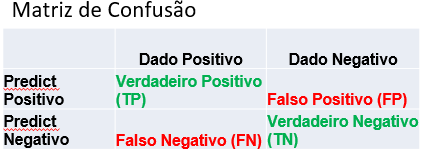

**classes 0 (não ocorrência de doenças cardíacas)** e **1 (ocorrência de doenças cardíacas).**


<Axes: >

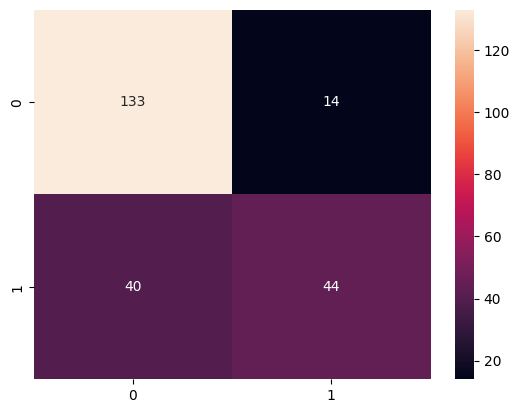

In [ ]:
#coluna valor predito
#linha valor real
sns.heatmap(cm, annot=True ,fmt='d' )

133 não desenvolveram a doença (0) e máquina disse 0: **ACERTOU**

14 não desenvolveram a doença (0) e máquina disse 1: *ERROU*

40 desenvolveram a doença (1) e a máquina disse 0: *ERROU*

44 desenvolveram a doença (1) e máquina disse 1: **ACERTOU**

O **classification report** nos provê as três métricas de avaliação

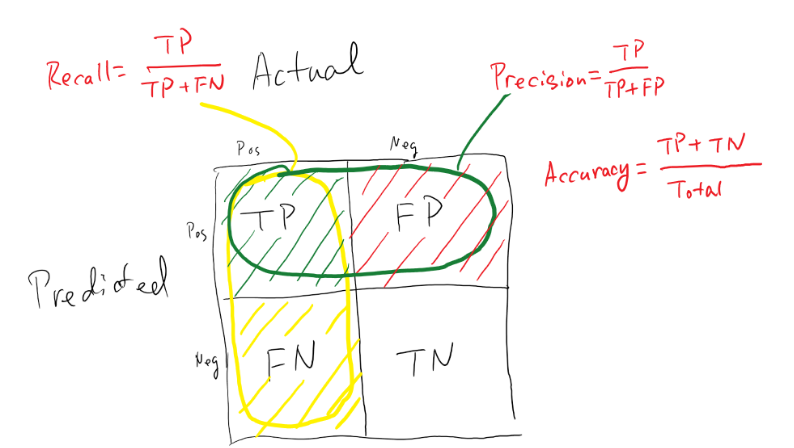

Fonte: http://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       147
           1       0.76      0.52      0.62        84

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.75       231



**Precision** é a capacidade do modelo de não prever uma instância negativa como positiva (não cometer erro do tipo 1). Para todas as instância classificadas como positivas, qual é o percentual de acerto.

Precision = TP/Predicted “Sim”. Quando é predito “Sim”, e o quanto frequente isso aconteceu


**Recall** é a capacidade do modelo de encontrar todas as instâncias positivas. Para todas as instâncias que são de fato positivas, qual é o percentual de acerto.

Sensitivity/Recall = TP/(TP + FN). Quando a classificação é realmente “Sim”, e o quanto frequente ocorreu o “Sim”.


A **métrica F1** conjuga as duas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurácia.

**Support** = é o numero de ocorrências de cada classe em “Sim”

### Extra

 #### Feature Selection

##### Utilizando **Regressão Linear** para Criar lista de Variáveis mais importantes (selecionar os atributos a serem usados em uma nova regressão logística - ou outro algoritmo de classificação)

A regressão Lasso atribui coeficiente ZERO para as Variáveis que tem pouca representatividade na Predição. Selecione um alfa adequado (o equivalente à penalidade). Quanto maior o alfa, menor será o número de variáveis selecionadas.

Quando reduzimos o número de atributos, estamos reduzindo a dimensão do problema.



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel_= SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train,y_train)

# let's print the number of total and selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('Total variáveis: {}'.format((X_train.shape[1])))
print('Variáveis Selecionadas: {}'.format(len(selected_feats)))
print('Variáveis com o coeficiente Zerado: {}'.format(np.sum(sel_.estimator_.coef_== 0)))

Total variáveis: 8
Variáveis Selecionadas: 5
Variáveis com o coeficiente Zerado: 3


In [ ]:
sel_.estimator_.coef_ != 0

array([ True,  True, False, False, False,  True,  True,  True])

In [ ]:
selected_feats

Index(['dor_peito', 'pressao_arterial', 'freq_cardiaca_max', 'angina_induzida',
       'talassemia_sangue'],
      dtype='object')

In [ ]:
df.head()

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cardiaca_max,angina_induzida,talassemia_sangue,resultado
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [ ]:
X_train_selected = X_train[selected_feats]
X_test_selected = X_test[selected_feats]
print(X_train_selected.shape, X_test_selected.shape)

(537, 5) (231, 5)


In [ ]:
X_train_selected.head()

,dor_peito,pressao_arterial,freq_cardiaca_max,angina_induzida,talassemia_sangue
590,0.647059,0.557789,0.697466,0.361657,0.400000
692,0.117647,0.608040,0.582712,0.345004,0.033333
492,0.235294,0.497487,0.488823,0.028608,0.200000
205,0.294118,0.557789,0.356185,0.140478,0.100000
709,0.117647,0.467337,0.566319,0.254483,0.033333


#### Criando uma nova máquina preditica com apenas as *features* (atributos) selecionados pelo modelo de regressão linerar **Lasso**.

In [ ]:
maquina_preditiva_selected = LogisticRegression()

In [ ]:
maquina_preditiva_selected.fit(X_train_selected, y_train)

LogisticRegression()

In [ ]:
y_pred_selected = maquina_preditiva_selected.predict(X_test_selected)
y_pred_selected

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Acurácia nos dados de teste para o primeiro modelo: %.3f%%" % (acuracia * 100.0))
acuracia_selected = accuracy_score(y_test, y_pred_selected)
print("Acurácia nos dados de teste para o segundo modelo: %.3f%%" % (acuracia_selected * 100.0))

Acurácia nos dados de teste para o primeiro modelo: 76.623%
Acurácia nos dados de teste para o segundo modelo: 77.489%


In [ ]:
print('Matrix de confusão para o primeiro modelo')
cm

Matrix de confusão para o primeiro modelo


array([[133,  14],
       [ 40,  44]])

In [ ]:
cm_selected = confusion_matrix(y_test, y_pred_selected)
print('Matrix de confusão para o segundo modelo')
cm_selected

Matrix de confusão para o segundo modelo


array([[135,  12],
       [ 40,  44]])

In [ ]:
print("relatório para o primeiro modelo\n-----------------------------\n")
print(classification_report(y_test, y_pred))

relatório para o primeiro modelo
-----------------------------

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       147
           1       0.76      0.52      0.62        84

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.75       231



In [ ]:
print("relatório para o segundo modelo\n-----------------------------\n")
print(classification_report(y_test, y_pred_selected))

relatório para o segundo modelo
-----------------------------

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       147
           1       0.79      0.52      0.63        84

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.77      0.76       231

